In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DS4B/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Impact of Remodeling on Sale Price:

Hypothesis: Properties that have been remodeled or renovated (indicated by the YearRemodAdd) sell at higher prices compared to those that haven't been, controlling for the age of the property.

Analyze the difference in sale prices between properties remodeled in the last 10 years versus those not remodeled in that timeframe.

In [ ]:

# Current year for age calculation
current_year = datetime.now().year

# Calculate the age of the property and the years since remodel
df['PropertyAge'] = current_year - df['YearBuilt']
df['YearsSinceRemodel'] = current_year - df['YearRemodAdd']

# Define remodeled status based on being remodeled in the last 10 years
df['RecentlyRemodeled'] = np.where(df['YearsSinceRemodel'] <= 10, 1, 0)

# Prepare the independent variables (X) and the dependent variable (y)
X = df[['RecentlyRemodeled', 'PropertyAge']]
y = df['SalePrice']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          2.99e-103
Time:                        03:29:53   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.534e+05   3567.90

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


R-squared: 0.273 - This value indicates that approximately 27.3% of the variance in SalePrice can be explained by the model. While this provides some insight, it also suggests that a significant portion of the variance in sale prices is not captured by these variables alone.

Adj. R-squared: 0.273 - Adjusted R-squared also reflects the variance explained by the model, adjusted for the number of predictors. It's practically identical to the R-squared in this case, suggesting minimal penalty for including multiple predictors in the model.

F-statistic and Prob (F-statistic): The F-statistic is 548.7, with a very small p-value (2.99e-103), indicating that the model is statistically significant. This means that there is a very strong evidence against the null hypothesis that neither of the variables have any effect on the sale price.

# Seasonality of Sales:

Hypothesis: The month or season of sale (MoSold, YrSold) affects the sale price of properties, with certain times of the year being more favorable for sellers.

Time-series analysis or comparing average sale prices by month/year could test this hypothesis.

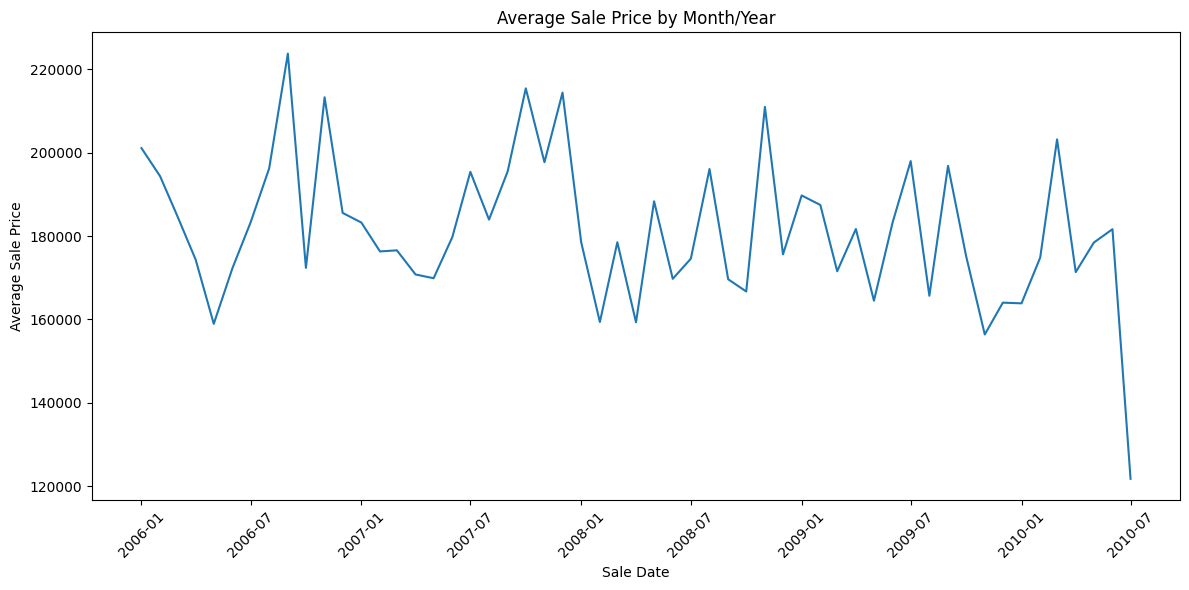

In [ ]:
df['SaleDate'] = df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str).str.zfill(2)

# Calculate the average sale price by SaleDate
monthly_avg = df.groupby('SaleDate')['SalePrice'].mean().reset_index()

# Sorting values by SaleDate to ensure chronological order in the plot
monthly_avg['SaleDate'] = pd.to_datetime(monthly_avg['SaleDate'])
monthly_avg = monthly_avg.sort_values(by='SaleDate')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='SaleDate', y='SalePrice', data=monthly_avg)
plt.xticks(rotation=45)
plt.xlabel('Sale Date')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Month/Year')
plt.tight_layout()

# Show plot
plt.show()

# Influence of Property Type and Style on Sale Price:

Hypothesis: Certain types of dwellings (BldgType) and architectural styles (HouseStyle) are more sought after and therefore sell at higher prices.

ANOVA or multiple regression could be used to assess the impact of these categorical variables on sale price.

In [ ]:
# ANOVA with BldgType
model_bldgtype = ols('SalePrice ~ C(BldgType)', data=df).fit()
anova_table_bldgtype = sm.stats.anova_lm(model_bldgtype, typ=2)
print("ANOVA for BldgType:\n", anova_table_bldgtype, "\n")

# ANOVA with HouseStyle
model_housestyle = ols('SalePrice ~ C(HouseStyle)', data=df).fit()
anova_table_housestyle = sm.stats.anova_lm(model_housestyle, typ=2)
print("ANOVA for HouseStyle:\n", anova_table_housestyle)

ANOVA for BldgType:
                    sum_sq      df          F        PR(>F)
C(BldgType)  3.179863e+11     4.0  13.011077  2.056736e-10
Residual     8.889925e+12  1455.0        NaN           NaN 

ANOVA for HouseStyle:
                      sum_sq      df          F        PR(>F)
C(HouseStyle)  7.947590e+11     7.0  19.595001  3.376777e-25
Residual       8.413152e+12  1452.0        NaN           NaN


Both ANOVA tests demonstrate significant differences in sale prices associated with both building type and house style. The very low p-values in both tests suggest these differences are not due to random chance, implying that certain building types and house styles are indeed more sought after, leading to higher sale prices. However, ANOVA does not tell us which specific categories of BldgType or HouseStyle are associated with higher or lower prices. For that, we would need to conduct post-hoc tests to compare mean sale prices between individual categories pairwise.








## Tukey's HSD Test

In [ ]:
# Perform Tukey's HSD for BldgType
tukey_bldgtype = pairwise_tukeyhsd(endog=df['SalePrice'],
                                   groups=df['BldgType'],
                                   alpha=0.05)

# Print the results
print("Tukey HSD test for BldgType:")
print(tukey_bldgtype)

# Perform Tukey's HSD for HouseStyle
tukey_housestyle = pairwise_tukeyhsd(endog=df['SalePrice'],
                                     groups=df['HouseStyle'],
                                     alpha=0.05)

# Print the results
print("\nTukey HSD test for HouseStyle:")
print(tukey_housestyle)

Tukey HSD test for BldgType:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -57331.5493 0.0006  -96159.006 -18504.0926   True
  1Fam Duplex -52222.7305    0.0 -82452.3736 -21993.0873   True
  1Fam  Twnhs -49852.1795 0.0004 -82977.3852 -16726.9738   True
  1Fam TwnhsE  -3804.4653 0.9877 -24712.6643  17103.7338  False
2fmCon Duplex   5108.8189 0.9985 -43333.7962  53551.4339  False
2fmCon  Twnhs   7479.3698 0.9943 -42821.0763   57779.816  False
2fmCon TwnhsE   53527.084 0.0067  10283.4901  96770.6779   True
Duplex  Twnhs    2370.551 0.9999 -41633.9352  46375.0372  False
Duplex TwnhsE  48418.2652 0.0021  12693.3671  84143.1633   True
 Twnhs TwnhsE  46047.7142  0.009   7841.4808  84253.9476   True
---------------------------------------------------------------

Tukey HSD test for HouseStyle:
      Multiple Comparison of Means - Tukey 

BldgType Results
* The test shows significant differences in mean sale prices between several pairs of building types. For instance, 1Fam (single-family homes) have significantly higher sale prices compared to 2fmCon (two-family conversion; all types converted to condos), Duplex, and Twnhs (townhouse inside unit), but not significantly different from TwnhsE (townhouse end unit).
* Specifically, single-family homes (1Fam) sell for more than duplexes, two-family conversions, and townhouse inside units, with differences ranging from approximately $49,852 to $57,332.
* However, there's no significant difference in sale price between 1Fam homes and townhouse end units (TwnhsE), suggesting that these end units are comparably valued to single-family homes in the market.
Among the less common types, 2fmCon and TwnhsE show a significant difference, indicating a premium for townhouse end units over converted two-family homes by over $53,527.

HouseStyle Results
* There are significant differences in mean sale prices across various house styles. Notably, 1Story homes tend to have higher sale prices compared to 1.5Fin (one and one-half story: 2nd level finished), and 2Story homes are also priced significantly higher than many other styles, reflecting a premium for these styles.
* 1Story homes show a significant price difference compared to several other styles, including a positive difference when compared to 1.5Fin homes (approximately $32,868 more) and a negative difference compared to homes with a foyer or split level (SFoyer and SLvl), indicating lower prices for the latter.
* The 2Story style shows a significant premium over SFoyer and SLvl styles, among others, with differences indicating that market preferences may lean towards traditional two-story designs.

Overall Interpretation
* The analysis highlights the market's valuation differences based on building type and house style. Single-family homes and end-unit townhouses, as well as one-story and two-story homes, generally fetch higher prices, reflecting their desirability among buyers.
* The lack of significant differences in some comparisons suggests that certain property types and styles are valued similarly in the market, indicating buyer preferences for specific features or configurations.
* These results can inform sellers, buyers, and real estate professionals about which property types and styles are most valued in the current market, potentially guiding investment and renovation decisions.